In [56]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [37]:
hr_dataset = pd.read_excel('/Users/rishavdas/Downloads/Data/HR_Employee_Attrition-1.xlsx')
hr_dataset.head()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [52]:
hr_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
EmployeeNumber,2940.0,1470.500000,848.849221,1.0,735.75,1470.5,2205.25,2940.0
Age,2940.0,36.923810,9.133819,18.0,30.00,36.0,43.00,60.0
DailyRate,2940.0,802.485714,403.440447,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,2940.0,9.192517,8.105485,1.0,2.00,7.0,14.00,29.0
Education,2940.0,2.912925,1.023991,1.0,2.00,3.0,4.00,5.0
EmployeeCount,2940.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EnvironmentSatisfaction,2940.0,2.721769,1.092896,1.0,2.00,3.0,4.00,4.0
HourlyRate,2940.0,65.891156,20.325969,30.0,48.00,66.0,84.00,100.0
JobInvolvement,2940.0,2.729932,0.711440,1.0,2.00,3.0,3.00,4.0
JobLevel,2940.0,2.063946,1.106752,1.0,1.00,2.0,3.00,5.0


In [38]:
hr_dataset.shape

(2940, 35)

In [39]:
hr_dataset.Gender.value_counts(normalize=True).mul(100).round(0).astype('str')+'%'

Male      60.0%
Female    40.0%
Name: Gender, dtype: object

## Discrete Univariate Analysis

In [40]:
def discrete_univariate_analysis(data, feature):
    total = len(data[feature])
    count = data[feature].nunique()
    plt.figure(figsize=(count+1, 5))
    plt.xticks(rotation = 90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette='flare', order = \
        data[feature].value_counts().index.sort_values(ascending = False))
    for p in ax.patches:
        label = "{:.1f}%".format(100*p.get_height()/total)
        x = p.get_x()+p.get_width()/2
        y = p.get_height()
        ax.annotate(label, (x,y), ha="center", va="center", size=12, xytext=(0,5), textcoords="offset points")
    plt.show()

In [41]:
hr_dataset.Gender.nunique()

2

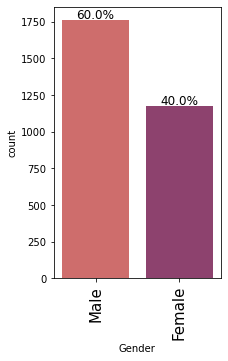

In [42]:
discrete_univariate_analysis(hr_dataset, 'Gender')

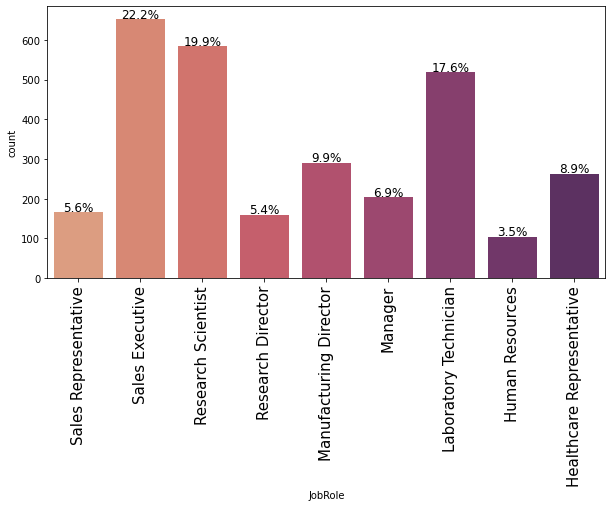

In [43]:
discrete_univariate_analysis(hr_dataset, 'JobRole')

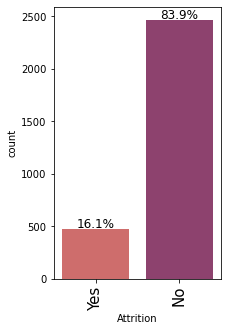

In [44]:
discrete_univariate_analysis(hr_dataset, 'Attrition')

In [45]:
hr_dataset[hr_dataset.Attrition ==  'Yes']['JobRole'].value_counts(normalize=True).mul(100).round(0).astype('str')+'%'

Laboratory Technician        26.0%
Sales Executive              24.0%
Research Scientist           20.0%
Sales Representative         14.0%
Human Resources               5.0%
Manufacturing Director        4.0%
Healthcare Representative     4.0%
Manager                       2.0%
Research Director             1.0%
Name: JobRole, dtype: object

In [35]:
hr_dataset.groupby(['JobRole', 'Attrition']).agg({'MonthlyIncome': 'mean'}).\
    round(0).astype('int').pivot_table(values='MonthlyIncome', columns = 'Attrition', index='JobRole')

Attrition,No,Yes
JobRole,,
Healthcare Representative,7454,8548
Human Resources,4392,3716
Laboratory Technician,3337,2919
Manager,17201,16797
Manufacturing Director,7290,7366
Research Director,15947,19396
Research Scientist,3328,2780
Sales Executive,6805,7489
Sales Representative,2798,2365


In [46]:
hr_dataset.groupby(['JobRole', 'Attrition']).agg({'PercentSalaryHike': 'mean'}).\
    round(0).astype('int').pivot_table(values='PercentSalaryHike', columns = 'Attrition', index='JobRole')

Attrition,No,Yes
JobRole,,
Healthcare Representative,16,14
Human Resources,15,14
Laboratory Technician,15,15
Manager,15,14
Manufacturing Director,16,14
Research Director,15,12
Research Scientist,15,16
Sales Executive,15,15
Sales Representative,16,15


In [47]:
def continuos_univariate_analysis(data, feature, figsize=(12, 7), kde = False):
    f1, (ax_box1, ax_hist1) = plt.subplots(nrows=2, sharex=True, gridspec_kw={'height_ratios':(0.25, 0.75)}, figsize=figsize)
    sns.color_palette('Pastel1')
    sns.boxplot(data=data, x=feature, ax = ax_box1, showmeans=True, color='Violet')
    sns.histplot(data=data, x=feature, ax=ax_hist1, kde=kde)
    ax_hist1.axvline(data[feature].mean(), color='green', linestyle='--')
    ax_hist1.axvline(data[feature].median(), color='orange', linestyle='-')
    

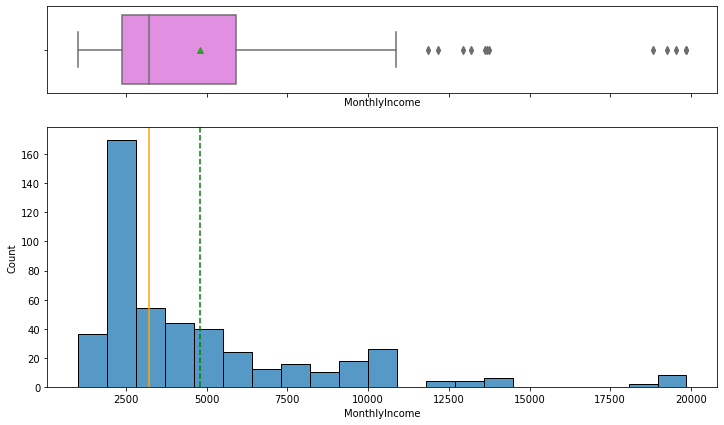

In [48]:
continuos_univariate_analysis(hr_dataset[hr_dataset.Attrition=='Yes'], 'MonthlyIncome')

## Bivariate Analysis

In [58]:
def bivariate_analysis(data, feature_list):
    plt.figure(figsize=(15,10))
    for i, variable in enumerate(feature_list):
        plt.subplot(3,2, i+1)
        sns.boxplot(data['Attrition'], data[variable], palette='viridis')
        plt.tight_layout()
        plt.title('Attrition vs '+variable)
    plt.show()

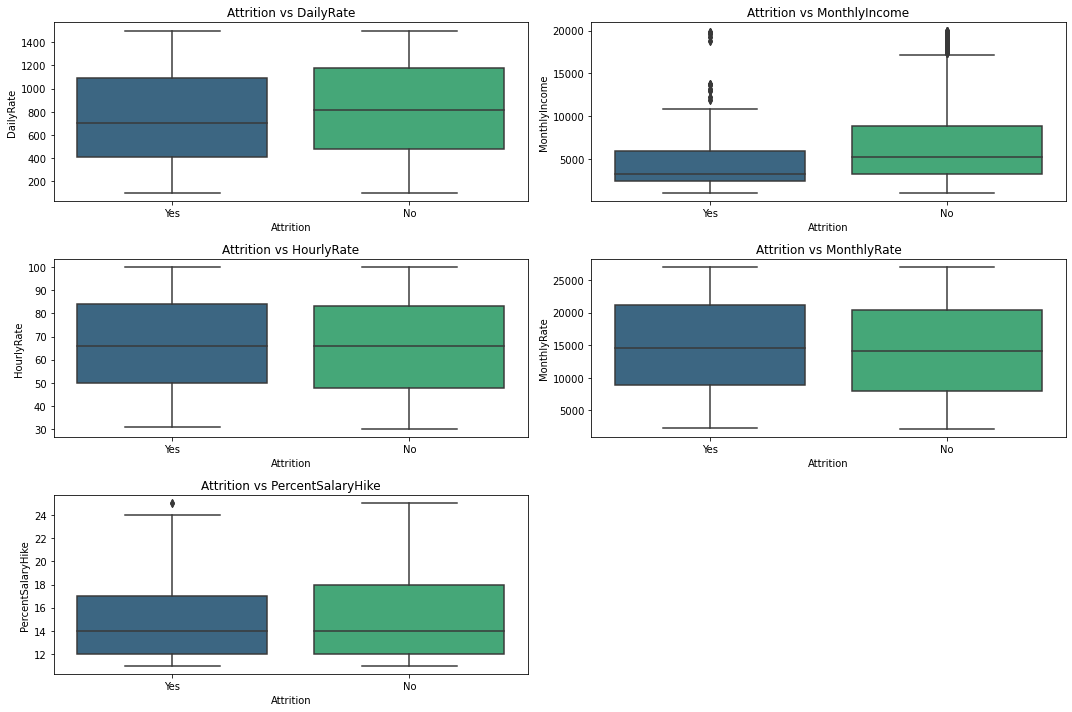

In [59]:
bivariate_analysis(hr_dataset, ['DailyRate', 'MonthlyIncome', 'HourlyRate', 'MonthlyRate', 'PercentSalaryHike' ])

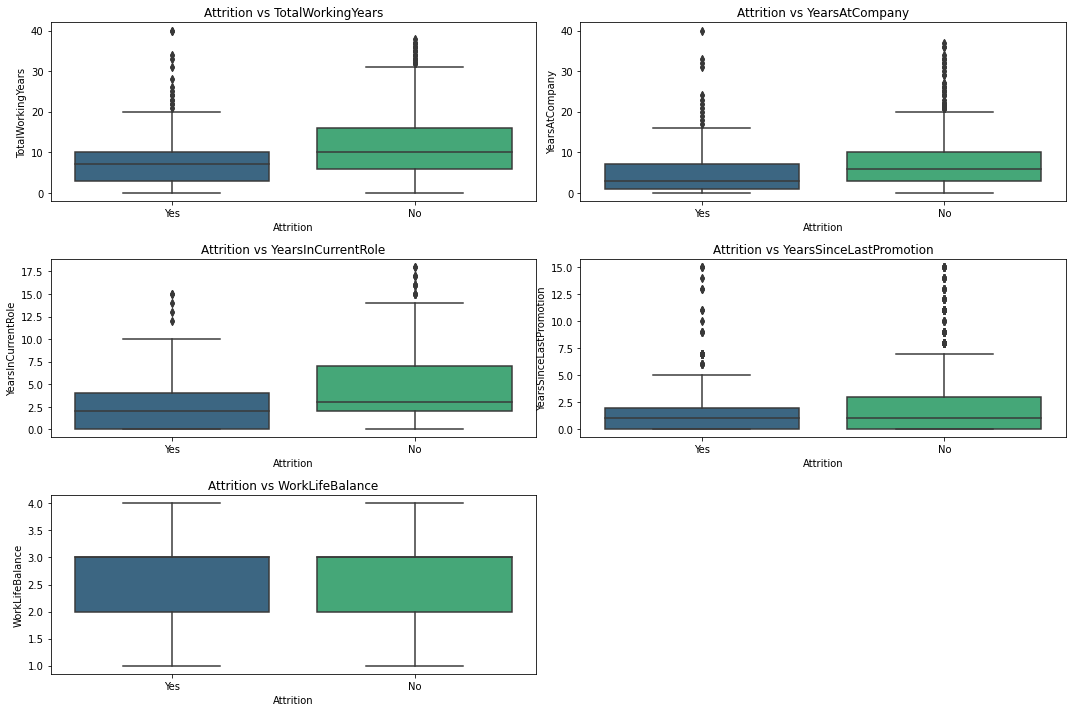

In [61]:
bivariate_analysis(hr_dataset, ['TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'WorkLifeBalance' ])

In [60]:
hr_dataset.columns

Index(['EmployeeNumber', 'Attrition', 'Age', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

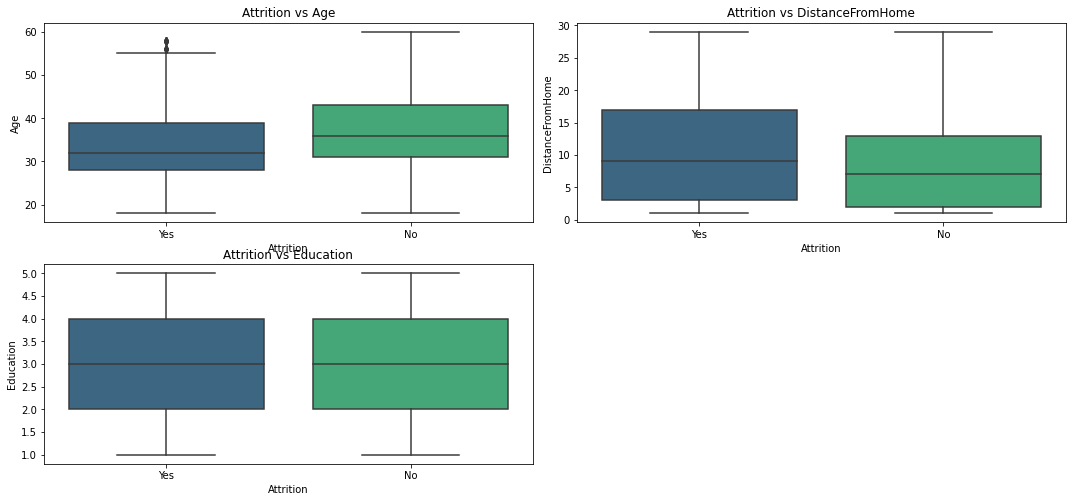

In [62]:
bivariate_analysis(hr_dataset, ['Age', 'DistanceFromHome', 'Education' ])